In [1]:
import pandas as pd

import utils
import seaborn as sns
from utils import *
from ego_graph_dataset import *

from pattern_mining import pattern_frequency
import numpy as np
from build_transaction import build_counting_transaction
from skmine.itemsets import LCM

In [2]:
number_of_graphs_per_rule = MUTAGENICITY_NUMBER_OF_GRAPH_PER_RULE

In [3]:
dataset_name = 'mutagenicity'
available_metrics = ["sum", "entropy", "cosine", "cheb", "likelyhood", "likelyhood_max", "hamming",
                           "focal_loss"]

Number of graphs: 2923


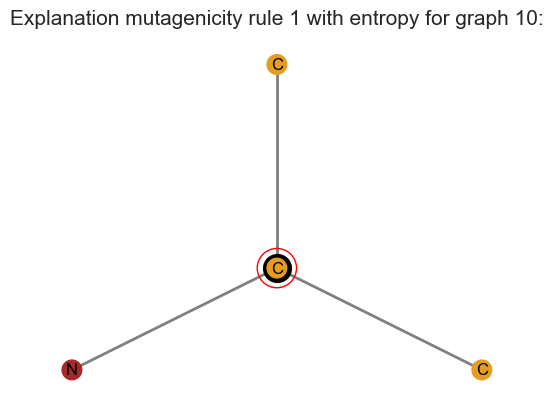

In [4]:
def plot_explanation(metric='cosine', rule=23, graph_id=1, fixed_size=True, size=3):
    data = select_active_graph(f"./activ_ego/mutag_{rule}labels_egos.txt", index_to_select=[graph_id])
    data = data[0]
    df_node_score = pd.read_csv(os.path.join("./results/mutagenicity/gcn/gstarx",
                             f"rule_{rule}/result_{dataset_name}_{rule}_{graph_id}.csv"))
    node_score = df_node_score[metric].values
    coalition = scores2coalition(node_score, sparsity=0.5, fixed_size=True, size=3,method='split_top')
    title_sentence = f"Explanation {dataset_name} rule {rule} with {metric} for graph {graph_id}:"
    node_attrs = data.x
    data['label'] = node_attrs
    plot = PlotUtils(dataset_name, is_show=True)
    plot.plot(utils.to_networkx(data,to_undirected=True, node_attrs=['label', 'center']),
              coalition, x=data.x,words='', title_sentence=title_sentence,figname='test.png')
plot_explanation(metric='entropy', rule=1, graph_id=10)

In [5]:
def plot_correlation_matrix(rule, graph_id,method='kendall'):
    df_node_score = pd.read_csv(os.path.join("./results/mutagenicity/gcn/gstarx",
                             f"rule_{rule}/result_{dataset_name}_{rule}_{graph_id}.csv"))
    corr = df_node_score.corr(method=method)
    sns.set(style="whitegrid")
    f, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5, ax=ax)
    plt.show()

In [6]:
def plot_explanation_and_correlation(rule, graph_id, method='kendall', metric='cosine'):
    plot_explanation(metric=metric, rule=rule, graph_id=graph_id)
    plot_correlation_matrix(rule=rule, graph_id=graph_id, method=method)

def plot_explanation_for_list_of_graphs(rule, list_of_graphs, metric='cosine', method='kendall'):
    for graph_id in list_of_graphs:
        plot_explanation(metric=metric, rule=rule, graph_id=graph_id)
        df_nodes_score = pd.read_csv(os.path.join("./results/mutagenicity/gcn/gstarx",
                             f"rule_{rule}/result_{dataset_name}_{rule}_{graph_id}.csv"))
        print(np.sort(df_nodes_score[metric].values))

def plot_explanation_and_corr_for_list_of_graphs(rule, list_of_graphs, metrics=['cosine'], method='kendall'):
    for graph_id in list_of_graphs:
        for metric in metrics:
            plot_explanation_and_correlation(rule=rule, graph_id=graph_id, method=method, metric=metric)

We can visualize some graphs from a specifix rule for a given metric, with the center circled in red and the top score nodes in bold

Number of graphs: 2923


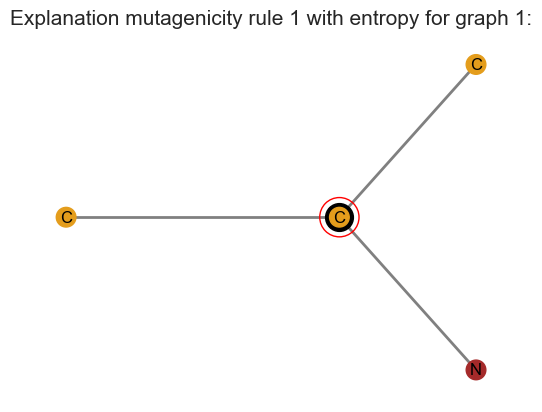

[-52.66583252 -16.79145813 -16.79144669  42.935112  ]
Number of graphs: 2923


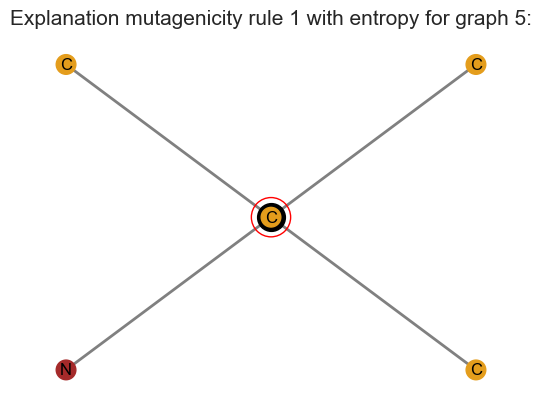

[-52.66545486 -16.79136276 -16.79132271 -16.79132271  57.37373734]
Number of graphs: 2923


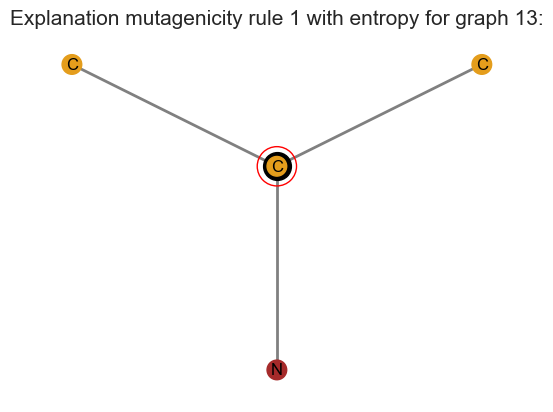

[-52.66587448 -16.79144859 -16.79144478  42.935112  ]


In [7]:
plot_explanation_for_list_of_graphs(rule=1, list_of_graphs=[1,5,13], metric='entropy', method='kendall')

In [10]:
def pattern_mining(rule, method, metric, nb_graphs):
    print('LCM algorithm ...')
    transactions = build_counting_transaction('results/mutagenicity/gcn/gstarx', metric=metric, rule=rule,
                  dataset_name="mutagenicity", graph_ids=np.arange(0,nb_graphs), fixed_size=True, size=3, sparsity=0.5, method=method)
    lcm = LCM(min_supp=1000, n_jobs=4)
    pattern = lcm.fit_transform(transactions)
    pattern
    return pattern

In [8]:
RULE = 1
METRIC = 'entropy'
METHOD = 'split_top'

In [9]:
frequent_itemsets_apriori, a_rules_apriori, pattern_lcm = pattern_mining(rule=RULE, method=METHOD, metric=METRIC, nb_graphs=number_of_graphs_per_rule[RULE])

/Users/natalievincent/elouan/lre/gnn_exaplainability/src/build_transaction.py:27: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  result_series = pd.Series(
/Users/natalievincent/elouan/lre/gnn_exaplainability/src/ego_graph_dataset.py:16: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if index_to_select == []:


Apriori algorithm ...
Building transactions...
Number of graphs: 2923


  0%|          | 0/2923 [00:00<?, ?it/s]


TypeError: 'NoneType' object is not subscriptable

In [11]:
print(f'Number of graph in the itemset: {number_of_graphs_per_rule[RULE]}')
pattern_lcm

Number of graph in the itemset: 2923


,itemset,support
0,[C1],2887
1,"[C1, C2]",2836
2,"[C1, N1]",2811
3,"[C1, C2, N1]",2760
